# Load Data

In [1]:
from proj1_helpers import *
from implementations import *
from cross_validation import *
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

oy, otx, oids = load_csv_data('Data/train.csv', False)
otest_y, otest_tx, otest_ids= load_csv_data('Data/test.csv', False)

#data = pd.read_csv('Data/train.csv', sep=",")


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

#df = data.sample(10)
#pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='hist')


Prediction
b    Axes(0.125,0.125;0.775x0.755)
s    Axes(0.125,0.125;0.775x0.755)
Name: DER_lep_eta_centrality, dtype: object

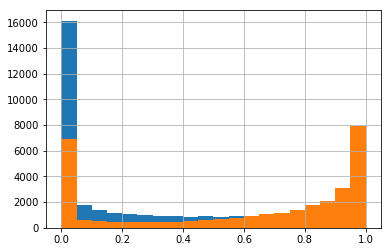

In [51]:
#data.DER_lep_eta_centrality[~data.DER_lep_eta_centrality.isin([-999.0])].groupby(data.Prediction).hist(bins=20)

In [52]:
#pd.plotting.scatter_matrix(data)

In [25]:
from preprocessing import *

#for nbColumns in range(2,11):
for nbColumns in [2, 5, 10]:
    y, tx, ids = oy, otx, oids
    test_y, test_tx,test_ids = otest_y, otest_tx, otest_ids
    # Preprocessing


    PRI_jet_num_colomn_train = tx[:, 22]
    PRI_jet_num_colomn_test = test_tx[:, 22]


    y_clustered = list()
    tx_clustered = list()
    ids_clustered = list()
    test_y_clustered = list()
    test_tx_clustered = list()
    test_ids_clustered = list()

    for i in range(4):
        indices = [ind for ind,a in enumerate(PRI_jet_num_colomn_train) if a == i]
        

        y_clustered.append(y[indices])
        tx_clustered.append(tx[indices])
        ids_clustered.append(ids[indices])

        test_indices = [ind for ind,a in enumerate(PRI_jet_num_colomn_test) if a == i]
        
        test_y_clustered.append(test_y[test_indices])
        test_tx_clustered.append(test_tx[test_indices])
        test_ids_clustered.append(test_ids[test_indices])

        #delete colinear columns and preprocess the data
        indices_to_delete = list()
        for col in range(tx_clustered[i].shape[1]):
            if min(tx_clustered[i][:, col]) == max(tx_clustered[i][:, col]):
                indices_to_delete.append(col)

        deleted_tx = np.delete(tx_clustered[i], indices_to_delete, 1)
        tx_clustered[i] = standardizeMatrix(addColumns(deleted_tx, nbColumns))
        
        deleted_tx = np.delete(test_tx_clustered[i], indices_to_delete, 1)
        test_tx_clustered[i] = standardizeMatrix(addColumns(deleted_tx, nbColumns))


    # Cross-Validation & Weight computation

    from cross_validation import *
    w = list()
    result = list()
    

    loss = 0
    perGood = 0
    maxW = 0
    for i in range(4):
        wi,loss_te, perGoodI = cross_validation_run(tx_clustered[i], y_clustered[i])
        w.append(wi)
        maxW += np.max(np.abs(wi))/4
        loss += loss_te/4
        perGood += perGoodI/4
        test_y_clustered[i] = predict_labels(w[i], test_tx_clustered[i])
        
    print("Number of columns : ", nbColumns, " loss : ", loss, "Max of w : ", maxW,  " Percentage of true Y : ", perGood)
    

Size of w before :  4.90764816114  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.745339294055
Size of  w after :  5.79258589138
Penalty : % =  0.745339294055   diff :  0.0
Size of w before :  4.89309212589  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.746206712484
Size of  w after :  5.77744220528
Penalty : % =  0.746206712484   diff :  0.0
Size of w before :  4.88105702246  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.743204110229
Size of  w after :  5.76464789664
Penalty : % =  0.743204110229   diff :  0.0
Size of w before :  4.87595081759  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.744672049109
Size of  w after :  5.75767134168
Penalty : % =  0.744672049109   diff :  0.0
Size of w before :  4.04535527743  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.641046803535
Size of  w after :  4.23840909658
Penalty : % =  0.641046803535   diff :  0.0
Size of w before :  4.12312191221  - - - - - - - -

/Users/arnaudpannatier/Documents/EPFL/MLProjects/linear_regression.py:14: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1+np.exp(tx.dot(w)))-y.T.dot(tx.dot(w)))


Size of  w after :  4.59104938135
Penalty : % =  0.487547968771   diff :  -0.154214635437
Size of w before :  4.38594775536  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.645732433505
Size of  w after :  4.56975347656
Penalty : % =  0.489638745534   diff :  -0.156093687971
Size of w before :  4.3537651369  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.646976313352
Size of  w after :  4.53528890898
Penalty : % =  0.49305279873   diff :  -0.153923514622
Size of w before :  4.43819368942  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.642080190552
Size of  w after :  4.62316152388
Penalty : % =  0.486515813153   diff :  -0.155564377398
Size of w before :  3.78078842605  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.69776815256
Size of  w after :  3.7630141931
Penalty : % =  0.69776815256   diff :  0.0
Size of w before :  3.65231897333  - - - - - - - - - - - - - - - - - - - Per ridge regression :  0.693256331589
Size of

KeyboardInterrupt: 

# Using least square on [cst, tx, tx^2, ...] 
31 - 0.695085425438 

61 - 0.776

91 - 0.787

121 - 0.796

151 - 0.805

181 - 0.807

211 - 0.809

241 - 0.816

271 - 0.822

# Post Processing

In [11]:
test_ids = [item for sublist in test_ids_clustered for item in sublist]
y_pred = [item for sublist in test_y_clustered for item in sublist]

test_ids, y_pred = zip(*sorted(zip(test_ids, y_pred)))

# Output Data

In [12]:
name = 'third-submission'
create_csv_submission(test_ids, y_pred, name)